<a href="https://colab.research.google.com/github/shineloveyc/hands-on-ML-Practice/blob/main/Classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#sklearn module provides downloading of the set
from sklearn.datasets import fetch_openml
import numpy as np


In [ ]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

Dataset loaded in Skikit-Learn generally have a similar dictionary structure:<br>
* A DESCR key describing the dataset
* A data key containing an array with one row per instance and one column per feature
* A target key containing an array with the labels

In [ ]:
#check the data
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

There are 70,000 images, and each image has 784 features. This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). Let’s take a peek at one digit from the dataset. All you need to do is grab an instance’s feature vector, reshape it to a 28 × 28 array, and display it using Matplotlib’s imshow() function:

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
#choose a samples
some_digit = X[0]
#reshape the image to 28*28
some_digit_image = some_digit.reshape(28, 28)

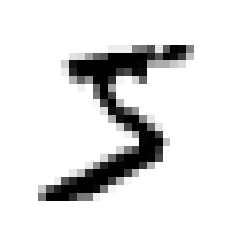

In [ ]:
plt.imshow(some_digit_image, cmap ='binary')
plt.axis("off")
plt.show()

In [ ]:
y[0]

'5'

In [ ]:
#covert the string to number
#8-bit unsigned integer (0 to 255)
y = y.astype(np.uint8)

In [ ]:
#split the dataset
X_train,X_test,y_train,y_test = X[:60000], X[60000:], y[:60000],y[60000:]

1. Training a Binary Classifier

In [ ]:
#true for 5, other false
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)         

1.1 SGD Classifier

In [ ]:
#Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class.
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
#measure performance
from sklearn.model_selection import cross_val_score

In [ ]:
#3 folder cv
cross_val_score(sgd_clf,X_train, y_train_5, cv =3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
#get the prediction via cv
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("precision score: ",precision_score(y_train_5,y_train_pred))
print('recore score: ', recall_score(y_train_5,y_train_pred))

precision score:  0.8370879772350012
recore score:  0.6511713705958311


In [ ]:
#compute f score
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

For each instance, it computes a score based on a decision function. If that score is greater than a threshold, it assigns the instance to the positive class; otherwise it assigns it to the negative class.

In [ ]:
#get threshold of the predictor
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = 'decision_function')

In [ ]:
y_scores.shape

(60000,)

In [ ]:
#compute the precison and recall for all the threshold
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

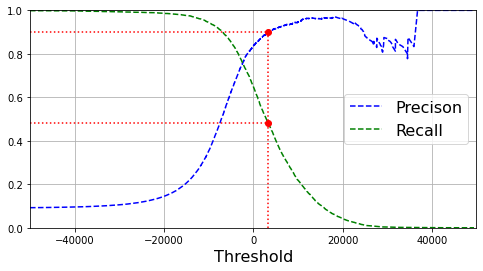

In [ ]:
#plot the precision and recall curve
def plot_precision_recall_vs_threshold(precisons, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label = "Precison")
  plt.plot(thresholds, recalls[:-1],"g--", label = 'Recall')
  plt.legend(loc="center right", fontsize=16) # Not shown in the book
  plt.xlabel("Threshold", fontsize=16)        # Not shown
  plt.grid(True)                              # Not shown
  plt.axis([-50000, 50000, 0, 1])             # Not shown


#search for the lowest threshold which gives at least 90% of the precison(np.argmax==>return the index)
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
#save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [ ]:
#plot the roc curve==>compute the TPR and FPR for various thresholds
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

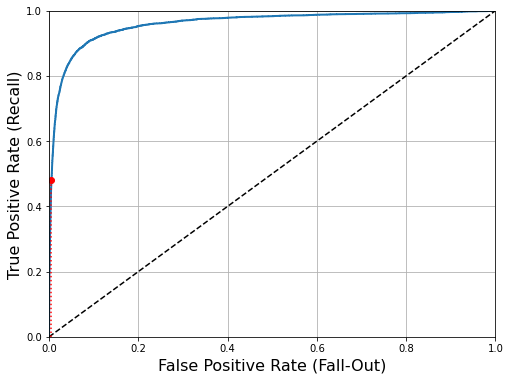

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
#save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [ ]:
#compute the auc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

1.2 Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv =3, method="predict_proba")

In [ ]:
#get the proba of the predication
y_scores_forest = y_probas_forest[:,1]
#fit labels and class probabilities to the roc curve
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

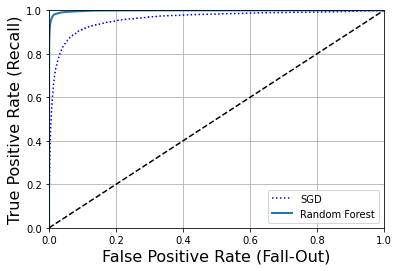

In [ ]:
#compare the roc_auc between SGD and RandomForest classifier
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

2. Multiuclass Classification

2.1 Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#make sure to ad [] to produce 2D array
svc_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
#svm run with OvO strategy
some_digit_scores = svc_clf.decision_function([some_digit])
#10 scores per instance, the highest score is the one corresponding to class 5
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [ ]:
np.argmax(some_digit_scores)

5

In [ ]:
#when classifier is trained, it stores the list of the target claesses in its classes_ attribute, ordered by value
svc_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#force sklearn to use OvR strategy
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
ovr_clf = OneVsRestClassifier(SVC())

In [ ]:
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

In [ ]:
#get the estimator
len(over_clf.estimators_)

2.2 SGD classifier

In [ ]:
#training and sgd classifier
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

In [ ]:
#check the score sgd assigned to each class
sgd_clf.decision_function([some_digit])

In [ ]:
#evaluate the SGD classifier accuracy
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
#scaling the inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3,scoring="accuracy")

3. Error Analysis

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train,cv=3)

In [ ]:
#get the confusion matrix
conf_mx = confusion_matrix(y_train, y_train_pred)

In [ ]:
conf_mx

In [ ]:
#check the image of the matrix
# since sklearn 0.22, you can use sklearn.metrics.plot_confusion_matrix()
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

In [ ]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [ ]:
 cl_a, cl_b = 3, 5
  X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
  X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
  X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
  X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
  plt.figure(figsize=(8,8))
  plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
  plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
  plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
  plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
  plt.show()

4. Multilabel Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#create one label indicate wheather the digit is more than 7
y_train_large = (y_train >= 7)
#create a 2nd label indicate wheather the digit is odd
y_train_odd = (y_train % 2 == 1)
#concatenate two labels
y_multilabel = np.c_[y_train_large, y_train_odd]

#train the classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
#make prediction
knn_clf.predict([some_digit])

4.1 Evaluate the results

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train,y_multilabel, cv=3)

#get the average F1 scores of two labels
f1_score(y_multilabel, y_train_knn_pred, average = "macro")
#to give more weights to labels with more samples, change "macro" to 'weighted'

5. Multioutput Classification

In [ ]:
#create random noise
noise = np.random.randint(0, 100, (len(X_train), 784))
#add noise to train set
X_train_mod = X_train + noise
#add noise to test set
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
#output clean image so the target is the original image
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
"""Notice that the classifier’s output is multilabel (one label per pixel) and 
   each label can have multiple values (pixel intensity ranges from 0 to 255). 
   It is thus an example of a multioutput classification system."""
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

5. Exercise